In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from aging.plotting import format_plots, figure, save_factory, PlotConfig

In [4]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "beh-individualization", tight_layout=False)

In [5]:
def load_long_df(version=5):
    usage_mtx = pd.read_parquet(
        f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/longtogeny_males_clean.parquet"
    )
    return usage_mtx

In [6]:
df = load_long_df(version=5)

In [7]:
corrs = df.iloc[:, :40].groupby('mouse').corr(method='spearman').fillna(0)

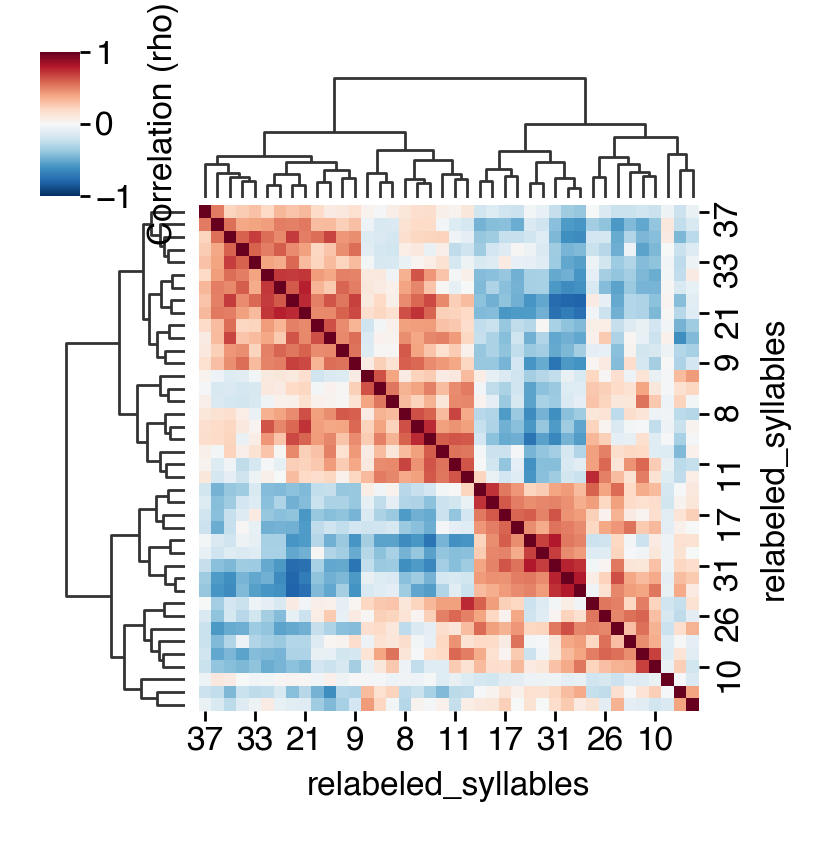

In [8]:
g = sns.clustermap(
    df.iloc[:, :40].corr(method="spearman"),
    method="complete",
    cmap="RdBu_r",
    figsize=(2, 2),
    vmin=-1,
    vmax=1,
    cbar_kws=dict(label="Correlation (rho)"),
)

In [9]:
examples = ['01_01', '02_04', '04_02']

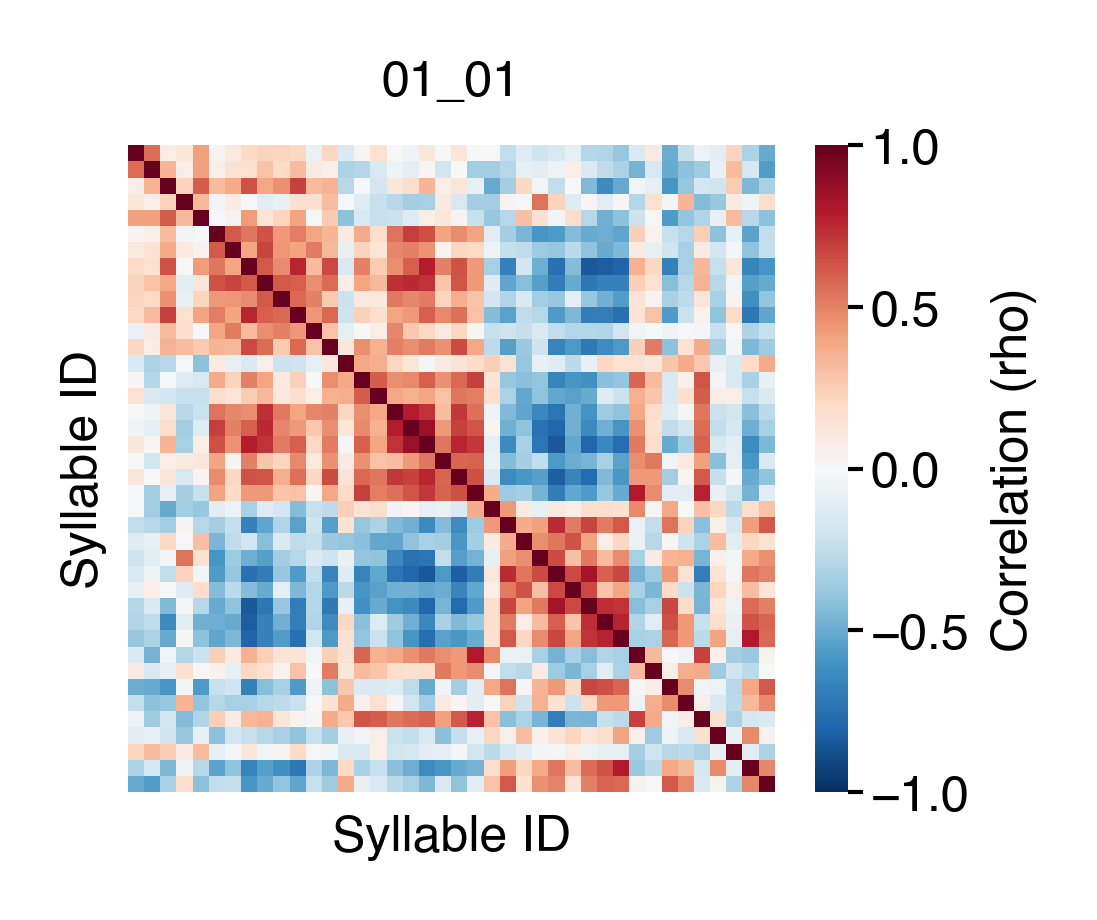

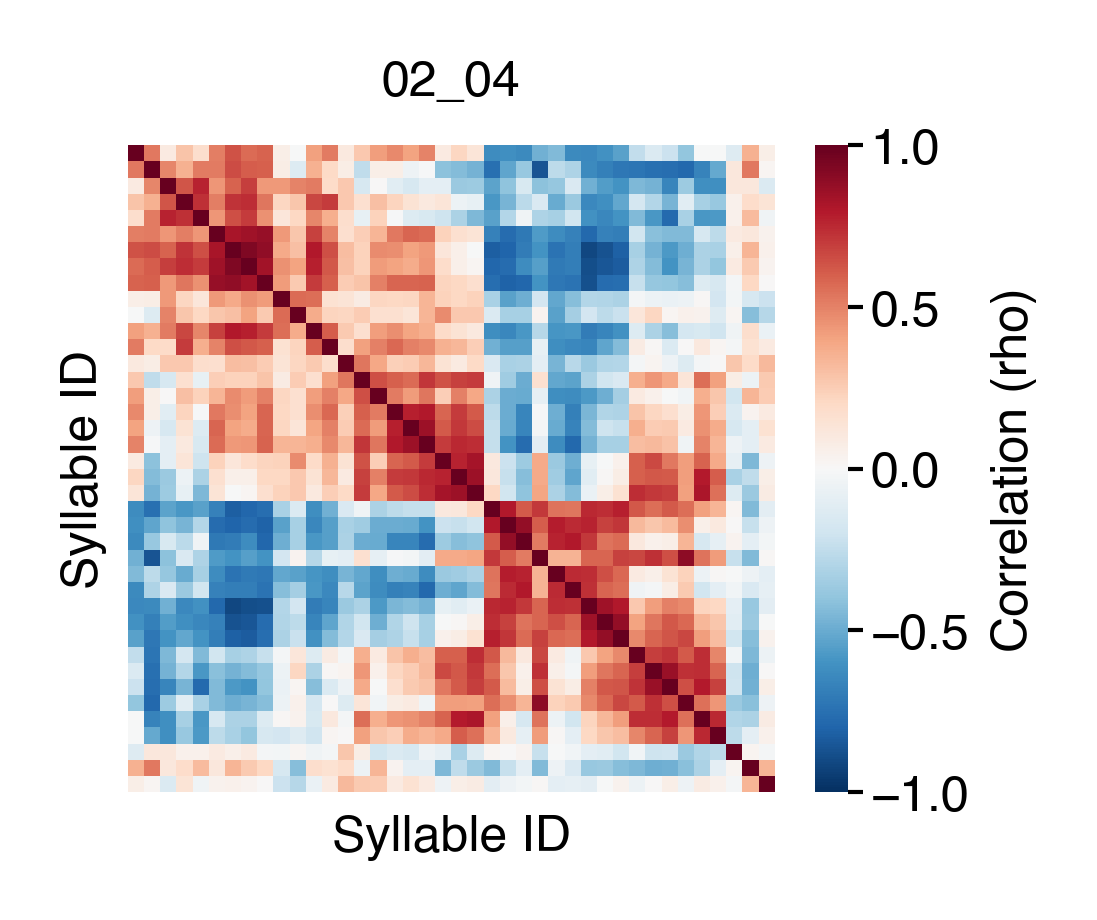

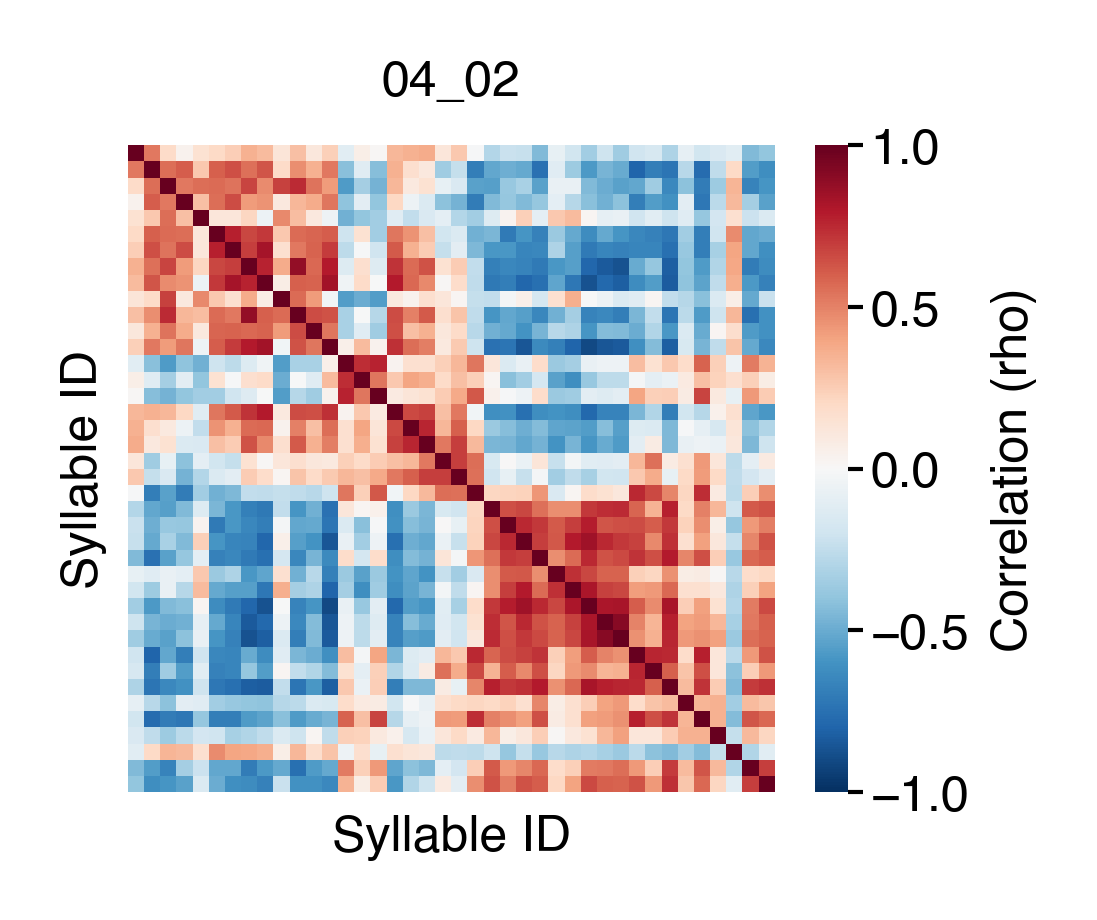

In [11]:
for animal in examples:
    fig = figure(1.75, 1.4)
    ax = sns.heatmap(
        corrs.loc[animal].to_numpy()[g.dendrogram_row.reordered_ind][
            :, g.dendrogram_row.reordered_ind
        ],
        vmin=-1,
        vmax=1,
        cmap="RdBu_r",
        cbar_kws=dict(label="Correlation (rho)"),
    )
    ax.set(
        aspect="equal",
        title=animal,
        xticks=[],
        yticks=[],
        xlabel="Syllable ID",
        ylabel="Syllable ID",
    )
    saver(fig, f"{animal}_usage_correlation_mtx");